In [1]:
%matplotlib inline

import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from chspy import join
from neurolib.models.multimodel.builder.thalamus import (
    TCR_DEFAULT_PARAMS,
    TRN_DEFAULT_PARAMS,
    ThalamicNode,
)
from neurolib.utils.stimulus import OrnsteinUhlenbeckProcess, ZeroInput

DATA = "data/fig3-thalamus_bifurcation"

DPI = 75
CMAP = "plasma"
plt.rcParams["figure.figsize"] = (20, 9)
plt.style.use("default_light")

In [2]:
def thalamus_ts(glk, gh, noise):
    DURATION = 10000.0
    SPIN_UP = 5000.0
    DT = 1
    SEED = 42
    thalamus = ThalamicNode(
        tcr_params={**TCR_DEFAULT_PARAMS, "g_LK": glk, "g_h": gh},
        trn_params={**TRN_DEFAULT_PARAMS, "g_LK": glk},
    )
    thalamus.index = 0
    thalamus.idx_state_var = 0
    thalamus.init_node()
    noise_tcr = OrnsteinUhlenbeckProcess(
        mu=0.0, sigma=noise, tau=5.0, seed=SEED
    ).as_cubic_splines(duration=DURATION + SPIN_UP, dt=DT)
    noise_trn = ZeroInput().as_cubic_splines(DURATION + SPIN_UP, DT)

    results = thalamus.run(
        duration=DURATION + SPIN_UP,
        dt=DT,
        noise_input=join(noise_tcr, noise_trn),
        backend="jitcdde",
    )
    return results.sel({"time": slice(SPIN_UP / 1000.0, None)})

In [5]:
spindles_xr = xr.open_dataarray(os.path.join(DATA, "spindles_detection_trn_thresh.nc"))

In [4]:
# no spindles for high g_LK, so manually add to get nice figs
coords = {
    "g_LK": list(set(spindles_xr["g_h"].values) - set(spindles_xr["g_LK"].values)),
    "g_h": spindles_xr["g_h"].values,
    "tcr_noise": spindles_xr["tcr_noise"].values,
}
dims = coords.keys()
add_df = xr.DataArray(0.0, dims=dims, coords=coords)
spindles_xr = xr.concat([add_df, spindles_xr], dim="g_LK").sortby("g_LK")

/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 61%|██████    | 9111/15000 [00:00<00:00, 91101.83it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 92469.33it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 53%|█████▎    | 7971/15000 [00:00<00:00, 79701.14it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 83739.03it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 52%|█████▏    | 7801/15000 [00:00<00:00, 78006.35it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 79949.37it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 29%|██▊       | 4301/15000 [00:00<00:00, 43001.43it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 42669.16it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 28%|██▊       | 4220/15000 [00:00<00:00, 42197.93it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 42225.33it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 29%|██▉       | 4411/15000 [00:00<00:00, 44103.94it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 43996.93it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 27%|██▋       | 4066/15000 [00:00<00:00, 40657.13it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 40122.29it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 27%|██▋       | 4102/15000 [00:00<00:00, 41017.11it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 40778.38it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 29%|██▉       | 4319/15000 [00:00<00:00, 43183.14it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 42134.36it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 27%|██▋       | 3993/15000 [00:00<00:00, 39924.80it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 40389.21it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 27%|██▋       | 3996/15000 [00:00<00:00, 39949.75it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 40031.74it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=1.0. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")
 27%|██▋       | 4048/15000 [00:00<00:00, 40471.06it/s]

Using default integration parameters.


100%|██████████| 15000/15000 [00:00<00:00, 36442.19it/s]
/Users/nikola/.virtualenvs/sleepy/lib/python3.7/site-packages/ipykernel_launcher.py:191: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


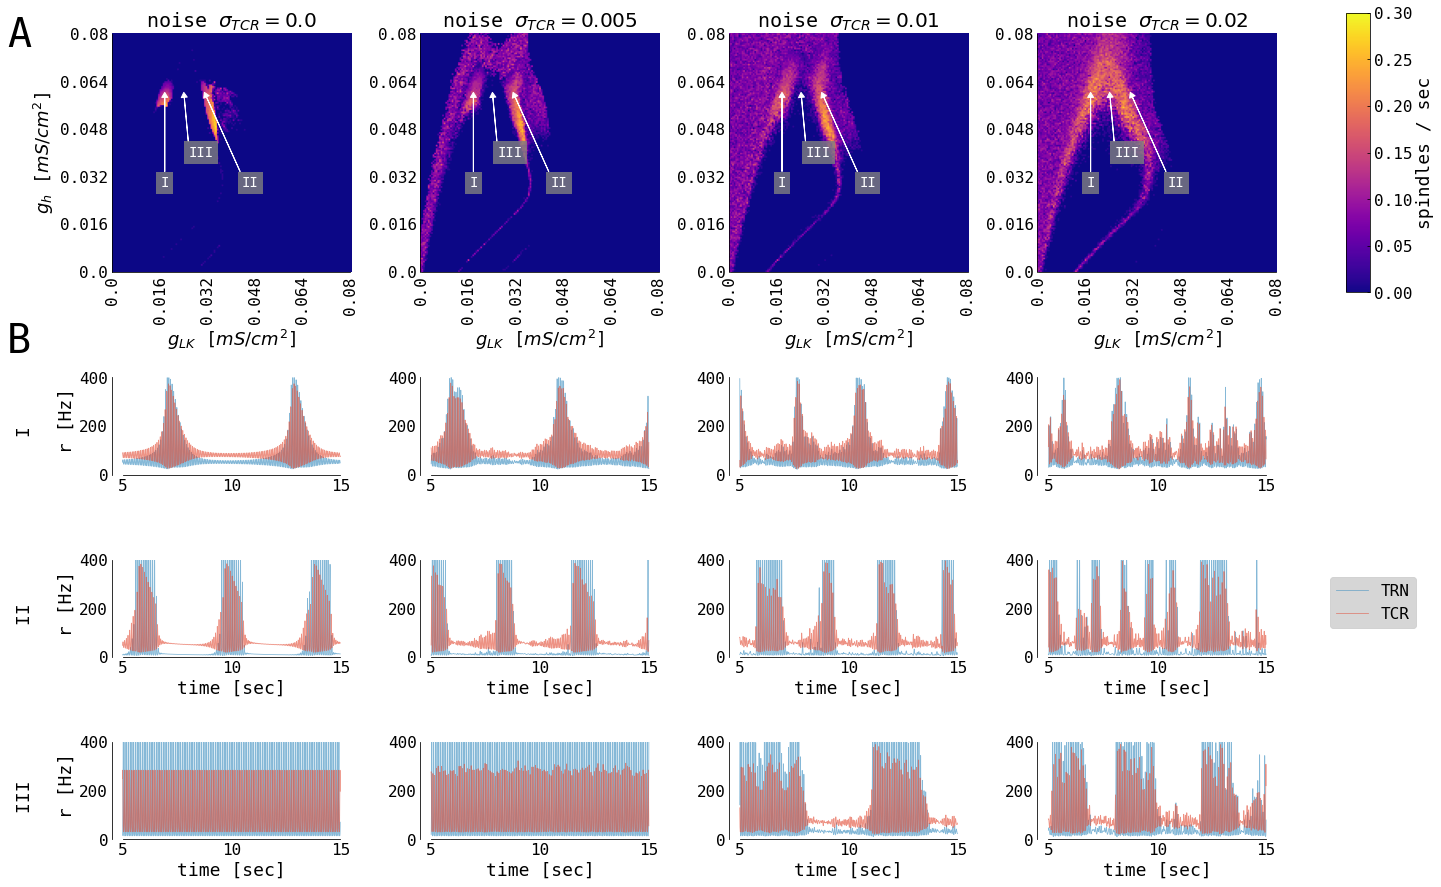

In [5]:
duration = 60
ncols = len(spindles_xr["tcr_noise"])

TICK_EVERY = 30
LOW_GLK = 0.018
HIGH_GLK = 0.031
NOISE_GLK = 0.024

fig = plt.figure(figsize=(20, 12.5))
gs = fig.add_gridspec(5, ncols + 1, width_ratios=[1] * ncols + [0.1])

gh_pos = int(((0.060 / spindles_xr["g_h"].max()).values) * len(spindles_xr["g_h"]))
low_glk_pos = int(
    ((LOW_GLK / spindles_xr["g_LK"].max()).values) * len(spindles_xr["g_LK"])
)
high_glk_pos = int(
    ((HIGH_GLK / spindles_xr["g_LK"].max()).values) * len(spindles_xr["g_LK"])
)
noise_glk_pos = int(
    ((NOISE_GLK / spindles_xr["g_LK"].max()).values) * len(spindles_xr["g_LK"])
)
bbox_props = dict(boxstyle="square", facecolor="gray", alpha=0.8, edgecolor="none")
arrow_props = dict(fc="white", ec="white", width=0.1, headwidth=6.0, headlength=5.0)

mini = np.nanmin(spindles_xr.values) / duration
maxi = np.nanmax(spindles_xr.values) / duration
ax_diag = False
ax_low = False
ax_high = False
ax_noise = False
for i, noise in enumerate(spindles_xr["tcr_noise"]):

    # bif diagram
    if ax_diag:
        ax_diag = fig.add_subplot(gs[:2, i], sharex=ax_diag, sharey=ax_diag)
    else:
        ax_diag = fig.add_subplot(gs[:2, i])
        ax_diag.set_ylabel("$g_{h}$ [$mS/cm^2$]")
    f = spindles_xr.sel({"tcr_noise": noise.values}).values
    f[np.isnan(f)] = 0.0
    ax_diag.imshow(f.T / duration, cmap=CMAP, origin="lower", vmin=mini, vmax=maxi)
    ax_diag.annotate(
        "I",
        xy=(low_glk_pos, gh_pos),
        xytext=(low_glk_pos, gh_pos // 2),
        color="w",
        fontsize=14,
        ha="center",
        va="center",
        bbox=bbox_props,
        arrowprops=arrow_props,
    )
    ax_diag.annotate(
        "II",
        xy=(high_glk_pos, gh_pos),
        xytext=(int(high_glk_pos * 1.5), gh_pos // 2),
        color="w",
        fontsize=14,
        ha="center",
        va="center",
        bbox=bbox_props,
        arrowprops=arrow_props,
    )
    ax_diag.annotate(
        "III",
        xy=(noise_glk_pos, gh_pos),
        xytext=(int(noise_glk_pos * 1.25), gh_pos // 1.5),
        color="w",
        fontsize=14,
        ha="center",
        va="center",
        bbox=bbox_props,
        arrowprops=arrow_props,
    )
    ax_diag.set_yticks(np.arange(len(spindles_xr["g_h"]))[::TICK_EVERY])
    ax_diag.set_yticklabels([gh.values for gh in spindles_xr["g_h"]][::TICK_EVERY])
    ax_diag.set_xticks(np.arange(len(spindles_xr["g_LK"]))[::TICK_EVERY])
    ax_diag.set_xticklabels(
        [gh.values for gh in spindles_xr["g_LK"]][::TICK_EVERY], rotation=90
    )
    ax_diag.set_xlabel("$g_{LK}$ [$mS/cm^2$]")
    ax_diag.set_title(f"noise $\sigma_{{TCR}}={noise.values}$")

    # timeseries
    low_glk = thalamus_ts(glk=LOW_GLK, gh=0.062, noise=noise.values)
    if ax_low:
        ax_low = fig.add_subplot(gs[2, i], sharex=ax_low, sharey=ax_low)
    else:
        ax_low = fig.add_subplot(gs[2, i])
        ax_low.set_ylabel("I \n\n r [Hz]")
    (l1,) = ax_low.plot(
        low_glk.time,
        low_glk["r_mean_INH"] * 1000.0,
        color="C1",
        alpha=0.6,
        linewidth=0.8,
    )
    (l2,) = ax_low.plot(
        low_glk.time,
        low_glk["r_mean_EXC"] * 1000.0,
        color="C0",
        alpha=0.6,
        linewidth=0.8,
    )
    ax_low.set_ylim([0, 400])
    sns.despine(trim=True)

    high_glk = thalamus_ts(glk=HIGH_GLK, gh=0.062, noise=noise.values)
    if ax_high:
        ax_high = fig.add_subplot(gs[3, i], sharex=ax_high, sharey=ax_high)
    else:
        ax_high = fig.add_subplot(gs[3, i])
        ax_high.set_ylabel("II \n\n r [Hz]")
    ax_high.plot(
        high_glk.time,
        high_glk["r_mean_INH"] * 1000.0,
        color="C1",
        alpha=0.6,
        linewidth=0.8,
    )
    ax_high.plot(
        high_glk.time,
        high_glk["r_mean_EXC"] * 1000.0,
        color="C0",
        alpha=0.6,
        linewidth=0.8,
    )
    ax_high.set_ylim([0, 400])
    sns.despine(trim=True)
    ax_high.set_xlabel("time [sec]")
    
    noise_ts = thalamus_ts(glk=NOISE_GLK, gh=0.062, noise=noise.values)
    if ax_noise:
        ax_noise = fig.add_subplot(gs[4, i], sharex=ax_noise, sharey=ax_noise)
    else:
        ax_noise = fig.add_subplot(gs[4, i])
        ax_noise.set_ylabel("III \n\n r [Hz]")
    ax_noise.plot(
        noise_ts.time,
        noise_ts["r_mean_INH"] * 1000.0,
        color="C1",
        alpha=0.6,
        linewidth=0.8,
    )
    ax_noise.plot(
        noise_ts.time,
        noise_ts["r_mean_EXC"] * 1000.0,
        color="C0",
        alpha=0.6,
        linewidth=0.8,
    )
    ax_noise.set_ylim([0, 400])
    sns.despine(trim=True)
    ax_noise.set_xlabel("time [sec]")

cbar_ax = fig.add_subplot(gs[:2, -1])
cbar = mpl.colorbar.ColorbarBase(
    cbar_ax,
    cmap=plt.get_cmap(CMAP),
    norm=mpl.colors.Normalize(vmin=mini, vmax=maxi),
    orientation="vertical",
)
cbar.set_label("spindles / sec")
fig.legend(
    (l1, l2),
    ("TRN", "TCR"),
    loc="center",
    bbox_to_anchor=(0.95, 0.32),
    bbox_transform=fig.transFigure,
)
plt.tight_layout()
plt.text(
    0.01,
    0.95,
    "A",
    ha="center",
    va="center",
    transform=fig.transFigure,
    fontsize=40,
)
plt.text(
    0.01,
    0.61,
    "B",
    ha="center",
    va="center",
    transform=fig.transFigure,
    fontsize=40,
)

plt.tight_layout()

# to PDF due transparency
plt.savefig(
    "../figs/thalamus_bifurcation.pdf", dpi=DPI, transparent=True, bbox_inches="tight"
)